### Imports

In [1]:
import cartoframes
import pathways
from cartoframes.viz import Map, Layer, color_category_style
from pathways.auth import set_default_credentials
from pathways.catalog import search
import geopandas as gpd
import pandas as pd
import seaborn as sns
from pathways.display import display_info

In [2]:
cartoframes.utils.setup_metrics(False)

### Setting up Pathways client

In [3]:
#set_default_credentials('creds.json')

In [4]:
datasets = search('bike')
datasets

,Id,Name,DisplayName,GeometryType
0,a52b1a22-9d72-4572-ad5a-352c4893b18c,Bike Infrastructure,Bike Infrastructure,LRSLine
1,57f36d93-0a6d-4a49-ad9a-b24b5ce086d8,Bike & Pedestrian Safety,Bike & Pedestrian Safety,LrsPoint


In [5]:
bike_df = pathways.read_dataset('57f36d93-0a6d-4a49-ad9a-b24b5ce086d8')

downloading from pathways:: 2.71MB [00:00, 6.41MB/s]                                                                   


In [6]:
infra_df = pathways.read_dataset('a52b1a22-9d72-4572-ad5a-352c4893b18c')

downloading from pathways:: 844kB [00:00, 3.86MB/s]                                                                    


In [7]:
Map(Layer(bike_df))

In [8]:
display_info(bike_df)

In [9]:
display_info(bike_df)

In [10]:
bike_df.dtypes

RTE_NM              object
MEASURE            float64
DOCUMENT_NBR         int64
CRASH_YEAR          object
CRASH_SEVERITY      object
                    ...   
NODE                object
OFFSET             float64
LAT                float64
LON                float64
geometry          geometry
Length: 152, dtype: object

In [11]:
# How does the presence of built infrastructure affect accidents?
# Calculate the number of bike and pedestrian accidents that occur in the absence of built infrastructure

bike_df.groupby(['BIKE_NONBIKE']).size().reset_index(name='counts').sort_values(['counts'], ascending=False)

,BIKE_NONBIKE,counts
0,0,10971
1,1,4488


In [12]:
subset_bike_df = bike_df[(bike_df.PED_NONPED.str.fullmatch("1", na=False))]
subset_bike_df

,RTE_NM,MEASURE,DOCUMENT_NBR,CRASH_YEAR,CRASH_SEVERITY,DRIVER_VEHICLENUMBER,DRIVER_INJURYTYPE,DRIVER_AGE,DRIVER_GENDER,DRIVER_ACTION_TYPE_CD,...,INTERSECTION_ANALYSIS,PLAN_DISTRICT,MPO_NAME,ROUTE_OR_STREET_NM,RNS_MP,NODE,OFFSET,LAT,LON,geometry
0,R-VA029SC06603WB,0.031148,142880057,2014,A,1,PDO,64,Male,1. No Improper Action,...,0,8,NOVA,RT 6603 / MT VERNON CIRCLE,0.03,274546,1183.0,38.705908,-77.117434,POINT (-8584670.082 4679625.503)
1,R-VA000SC00015SB,0.000000,142775180,2014,C,1,PDO,24,Female,17. Other Improper Turn,...,2,8,NOVA,N. QUINN ST,0.00,100881,26.0,38.894163,-77.078193,POINT (-8580302.159 4706512.171)
2,S-VA000PR S JUNE ST,0.125716,140955153,2014,B,1,PDO,76,Male,1. No Improper Action,...,2,8,NOVA,26TH ST. S.,0.13,None,NaN,38.851974,-77.064044,POINT (-8578730.237 4700494.366)
5,R-VA000SC06591NB,0.060683,141715310,2014,B,1,PDO,59,Male,11. Did Not Have Right-of-Way,...,2,8,NOVA,ARLINGTON RIDGE ROAD,0.03,100307,26.0,38.845377,-77.064998,POINT (-8578832.702 4699535.288)
6,R-VA076SC03634SB,0.149493,140525219,2014,A,1,PDO,66,Female,1. No Improper Action,...,1,8,NOVA,ROUTE 3634 / GLADE BANK DRIVE,0.15,750483,132.0,38.773064,-77.444390,POINT (-8621073.068 4689205.911)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15452,R-VA IS00095SB,12.792476,210285263,2021,K,1,PDO,24,Male,1. No Improper Action,...,0,19,None,INTERSTATE 95,13.01,None,NaN,36.723622,-77.529953,POINT (-8630589.799 4400658.735)
15453,R-VA SR00294EB,13.377945,210895037,2021,B,1,None,None,n/a,34. Hit and Run,...,0,8,NOVA,0294 / PRINCE WILLIAM PARKWAY,13.38,None,NaN,38.651050,-77.301959,POINT (-8605196.847 4671816.595)
15454,R-VA099SC00621EB,0.306305,210125201,2021,B,1,C,87,Female,1. No Improper Action,...,0,23,HAMP,ROUTE 621 (GRAFTON DRIVE),0.31,671097,348.0,37.164219,-76.467250,POINT (-8512290.700 4462017.029)
15455,R-VA121UR07034EB,1.925092,210145256,2021,A,1,PDO,None,n/a,9. Other Improper Passing,...,0,23,HAMP,HARPERSVILLE RD,1.96,646380,290.0,37.095633,-76.450953,POINT (-8510491.619 4452452.109)


<AxesSubplot:xlabel='CRASH_SEVERITY', ylabel='Count'>

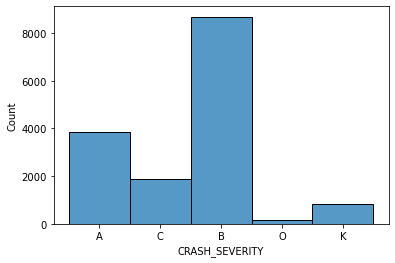

In [13]:
# Breakdown Accidents by Severity and Year
sns.histplot(data=bike_df, x="CRASH_SEVERITY")

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<AxesSubplot:xlabel='CRASH_YEAR', ylabel='Count'>

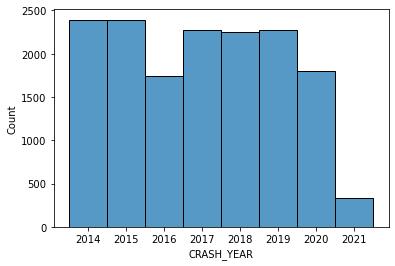

In [14]:
sns.histplot(data=bike_df, x="CRASH_YEAR")

<AxesSubplot:xlabel='RIM_BICYCLE_ACCESS_TYPE_NM', ylabel='Count'>

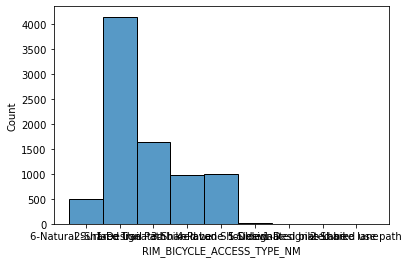

In [15]:
#Infrastructure Implemented By Type
sns.histplot(data=infra_df, x="RIM_BICYCLE_ACCESS_TYPE_NM")

In [16]:
#Display bike ped accidents by severity
Map(Layer(bike_df, color_category_style('CRASH_SEVERITY')))

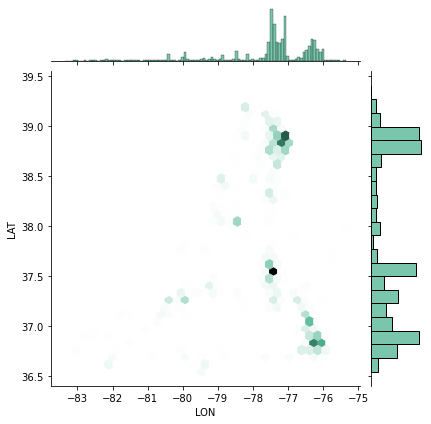

In [17]:
sns.jointplot(x=bike_df.LON, y=bike_df.LAT, kind="hex", color="#4CB391")